# Exploration of the Data

In [48]:
import pandas as pd
import numpy as np

In [49]:

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [50]:
#selecting columns with continuous values
numeric_features = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [51]:
cars_numeric = cars[numeric_features]
cars_numeric.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [52]:
cars_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  205 non-null    object 
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               205 non-null    object 
 8   stroke             205 non-null    object 
 9   compression-rate   205 non-null    float64
 10  horsepower         205 non-null    object 
 11  peak-rpm           205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


### Cleaning Data

In [53]:
cars_numeric = cars_numeric.replace('?', np.nan)
cars_numeric = cars_numeric.astype('float')


In [54]:
cars_numeric.isna().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [55]:
#drop rows with missing values in price
#since price is the target column
cars_numeric = cars_numeric.dropna(subset=['price'])
cars_numeric.isna().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [56]:
#fill missing values with mean of the column
cars_numeric = cars_numeric.fillna(cars_numeric.mean())

In [57]:
#confirm no missing values
cars_numeric.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [58]:
#normalizing values between 0 and 1, except price
price_cols = cars_numeric['price']
cars_numeric = (cars_numeric - cars_numeric.min()) / (cars_numeric.max() - cars_numeric.min())
cars_numeric['price'] = price_cols

In [59]:
cars_numeric

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.157068,0.655977,0.711940,0.735043,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.308411,0.510204,0.277778,0.315789,16845.0
201,0.157068,0.655977,0.711940,0.726496,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.523364,0.469388,0.166667,0.236842,19045.0
202,0.157068,0.655977,0.711940,0.735043,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.401869,0.551020,0.138889,0.184211,21485.0
203,0.157068,0.655977,0.711940,0.735043,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.271028,0.265306,0.361111,0.289474,22470.0


## Univariate Model

In [60]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(df, train_col, target_col):
    knn = KNeighborsRegressor()
    np.random.seed(0)

    #randomize the rows of dataframe
    shuffled_index = np.random.permutation(df.index)
    df_rand = df.reindex(shuffled_index)

    #split into test and train (70/30)
    split_point = int(len(df_rand) * 0.7)
    train = df_rand.iloc[0:split_point]
    test = df_rand.iloc[split_point:]

    #train model and predict
    knn.fit(train[[train_col]], train[target_col])
    predicted_val = knn.predict(test[[train_col]])

    #metric RMSE value
    rmse = np.sqrt(mean_squared_error(test[target_col], predicted_val))

    return rmse

In [61]:
#using model on all columns except price
rmse_vals = {}
features = list(cars_numeric.columns)
features.remove('price')
for feature in features:
    rmse = knn_train_test(cars_numeric, feature, 'price')
    rmse_vals[feature] = rmse

#best performing column
#convert the dictionary to series to easily sort the values
rmse_series = pd.Series(rmse_vals)
rmse_series.sort_values()

curb-weight          3048.874619
width                3281.120271
engine-size          3387.703742
highway-mpg          3548.638118
length               3758.935827
horsepower           4288.885945
city-mpg             4423.368805
bore                 4793.642525
normalized-losses    5706.657106
height               5943.931512
compression-rate     5944.578441
wheel-base           6222.962458
stroke               6563.408786
peak-rpm             7092.242774
dtype: float64

In [62]:
#modified train_test function to use varying values of k
def knn_train_test_k(df, train_col, target_col):
    np.random.seed(0)

    #randomize the rows of dataframe
    shuffled_index = np.random.permutation(df.index)
    df_rand = df.reindex(shuffled_index)

    #split into train and test (70/30)
    split_point = int(len(df_rand) * 0.7)
    train = df_rand.iloc[0:split_point]
    test = df_rand.iloc[split_point:]

    k_values = [1,3,5,7,9]
    k_rmses = {}

    for k in k_values:
                
        knn = KNeighborsRegressor(n_neighbors=k)
        #train model using k nearest neighbours
        knn.fit(train[[train_col]], train[target_col])

        #make predictions using model
        predicted_val = knn.predict(test[[train_col]])

        #metric; calculate RMSE value
        rmse = np.sqrt(mean_squared_error(test[target_col], predicted_val))
        k_rmses[k] = rmse
    return k_rmses

k_rmse_result = {}

#use model on all columns except price
features = cars_numeric.columns.drop('price')
for feature in features:
    k_rmse = knn_train_test_k(cars_numeric, feature, 'price')
    k_rmse_result[feature] = k_rmse

k_rmse_result

{'normalized-losses': {1: 5867.710755328411,
  3: 5512.293565105661,
  5: 5706.657106383393,
  7: 6081.279727419065,
  9: 6420.906383247828},
 'wheel-base': {1: 4437.503919185524,
  3: 6008.971747988491,
  5: 6222.962457770388,
  7: 5892.055741773716,
  9: 5202.90596502323},
 'length': {1: 3356.160428178625,
  3: 3504.8382265855757,
  5: 3758.9358265600545,
  7: 3952.1750605542907,
  9: 4004.491042114494},
 'width': {1: 3619.3493777242325,
  3: 4134.949667221522,
  5: 3281.1202710030134,
  7: 3082.1221039135658,
  9: 2952.9230503669382},
 'height': {1: 5474.908826248863,
  3: 6509.697612864131,
  5: 5943.931512082543,
  7: 5707.276947128214,
  9: 5526.653201439913},
 'curb-weight': {1: 3685.123880739078,
  3: 3233.825931717484,
  5: 3048.874618716837,
  7: 3184.83282567035,
  9: 3051.1601651453443},
 'engine-size': {1: 2890.7541616247513,
  3: 3233.7225457253194,
  5: 3387.7037423454904,
  7: 3196.585850408178,
  9: 3181.679168570305},
 'bore': {1: 6380.669878497136,
  3: 4284.61457544

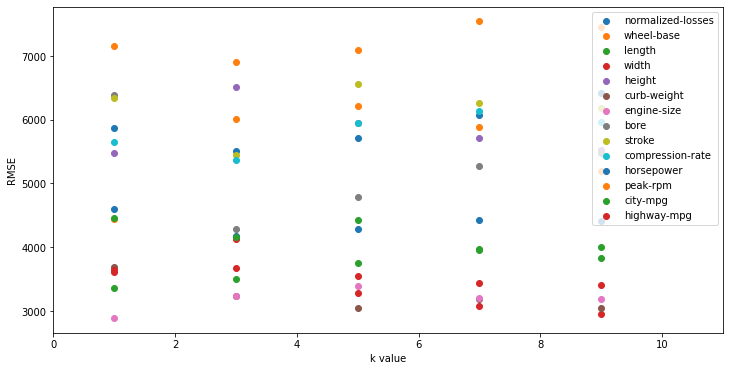

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,6))
for k,v in k_rmse_result.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.scatter(x,y, label='{}'.format(k))
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.xlim(0, 12)
    plt.legend(loc=0, prop={'size': 10})

plt.show()

## Multivariate Model

In [64]:
#take average of all rmse values per feature to get best features
features_rmse_avg = {}
for k,v in k_rmse_result.items():
    rmse_avg = np.mean(list(v.values()))
    features_rmse_avg[k] = rmse_avg
features_rmse_avg_series = pd.Series(features_rmse_avg)


engine-size          3178.089094
curb-weight          3240.763484
width                3414.092894
highway-mpg          3543.358231
length               3715.320117
city-mpg             4165.908730
horsepower           4381.653880
bore                 5242.753562
wheel-base           5552.879966
compression-rate     5811.771629
height               5832.493620
normalized-losses    5917.769507
stroke               6159.351840
peak-rpm             7229.374106
dtype: float64

In [67]:
best_features_ordered = features_rmse_avg_series.sort_values()
best_features_ordered

engine-size          3178.089094
curb-weight          3240.763484
width                3414.092894
highway-mpg          3543.358231
length               3715.320117
city-mpg             4165.908730
horsepower           4381.653880
bore                 5242.753562
wheel-base           5552.879966
compression-rate     5811.771629
height               5832.493620
normalized-losses    5917.769507
stroke               6159.351840
peak-rpm             7229.374106
dtype: float64

In [71]:
#modified train_test function to use varying values of k
def knn_train_test_k(df, train_col, target_col, k_values):
    np.random.seed(0)

    #randomize the rows of dataframe
    shuffled_index = np.random.permutation(df.index)
    df_rand = df.reindex(shuffled_index)

    #split into train and test (70/30)
    split_point = int(len(df_rand) * 0.7)
    train = df_rand.iloc[0:split_point]
    test = df_rand.iloc[split_point:]

    #using default k value
    #k_values = [5]
    k_rmses = {}

    for k in k_values:
                
        knn = KNeighborsRegressor(n_neighbors=k)
        #train model using k nearest neighbours
        knn.fit(train[train_col], train[target_col])

        #make predictions using model
        predicted_val = knn.predict(test[train_col])

        #metric; calculate RMSE value
        rmse = np.sqrt(mean_squared_error(test[target_col], predicted_val))
        k_rmses[k] = rmse
    return k_rmses


In [73]:
#use model on n best features
Bfeature_rmse_result = {}

best_features = best_features_ordered.index
for n in range(2,6):
    ft_col = best_features[0:n]
    b_rmse = knn_train_test_k(cars_numeric, ft_col, 'price', [5])
    Bfeature_rmse_result['{} best features'.format(n)] = b_rmse
    
Bfeature_rmse_result

{'2 best features': {5: 2742.576418709061},
 '3 best features': {5: 2079.8703449502036},
 '4 best features': {5: 2202.481459105823},
 '5 best features': {5: 2344.417961813151}}

## Hyperparameter Tuning

In [74]:
#Modified train_test function to use varying values of k
def knn_train_test_k(df, train_col, target_col, k_values):
    np.random.seed(0)

    #randomize the rows of dataframe
    shuffled_index = np.random.permutation(df.index)
    df_rand = df.reindex(shuffled_index)

    #split into train and test (70/30)
    split_point = int(len(df_rand) * 0.7)
    train = df_rand.iloc[0:split_point]
    test = df_rand.iloc[split_point:]

    
    k_rmses = {}
    for k in k_values:
                
        knn = KNeighborsRegressor(n_neighbors=k)
        #train model using k nearest neighbours
        knn.fit(train[train_col], train[target_col])

        #make predictions using model
        predicted_val = knn.predict(test[train_col])

        #metric; calculate RMSE value
        rmse = np.sqrt(mean_squared_error(test[target_col], predicted_val))
        k_rmses[k] = rmse
    return k_rmses

In [75]:
#varying k between 1 and 25
#for top 3 models in previous cell
top3_result = {}
params_k = range(1,26)
best_features = best_features_ordered.index
for n in [3,4,5]:
    ft_col = best_features[0:n]
    b_rmse = knn_train_test_k(cars_numeric, ft_col, 'price', params_k)
    top3_result['{} best features'.format(n)] = b_rmse
    
top3_result

{'3 best features': {1: 2019.649397426343,
  2: 1772.4658185332805,
  3: 1841.2347707107633,
  4: 2066.691171798574,
  5: 2079.8703449502036,
  6: 2142.7802709604844,
  7: 2164.2287555593784,
  8: 2429.2227634844744,
  9: 2508.6986388473497,
  10: 2480.3429896676475,
  11: 2405.0573990949442,
  12: 2498.308727008387,
  13: 2567.780976423974,
  14: 2624.500579679884,
  15: 2668.10252819932,
  16: 2738.832482112457,
  17: 2771.9977169520635,
  18: 2832.744389020588,
  19: 2885.8828916157727,
  20: 3046.586103820439,
  21: 3108.226079674018,
  22: 3122.8448773618748,
  23: 3174.7760709366416,
  24: 3249.974770223109,
  25: 3309.235158950296},
 '4 best features': {1: 1888.6756267159324,
  2: 1835.5257410076383,
  3: 2198.044440928965,
  4: 2106.800531008813,
  5: 2202.481459105823,
  6: 2169.0559825985656,
  7: 2383.4586988983674,
  8: 2416.1124018388864,
  9: 2425.8928348851055,
  10: 2401.484652814778,
  11: 2374.4720366682905,
  12: 2470.7271309154544,
  13: 2498.962354471136,
  14: 255

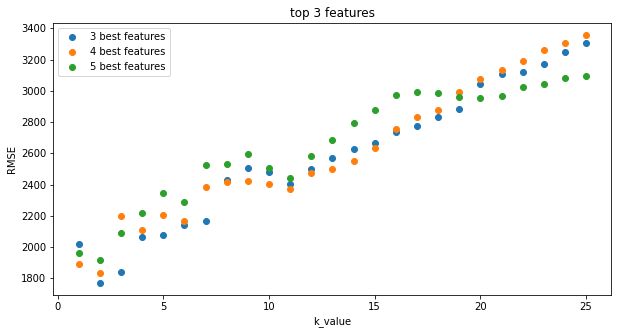

In [97]:
#plotting hyperparameter values for each model
plt.figure(figsize=(10,5))

for k,v in top3_result.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.scatter(x,y, label='{}'.format(k))
    plt.xlabel('k_value')
    plt.ylabel('RMSE')
    plt.title('top 3 features')
    plt.legend()

plt.show()